In [40]:
import pandas as pd

# Load results
df = pd.read_csv("df.csv")
df.head()

,race_true,race_pred,sex_true,sex_pred,age_true,age_pred,emotion_pred
0,asian,asian,male,male,50-59,30-39,neutral
1,indian,latino hispanic,female,female,30-39,30-39,sad
2,indian,asian,female,male,20-29,30-39,neutral
3,middle eastern,middle eastern,male,male,40-49,30-39,neutral
4,white,white,male,male,10-19,20-29,sad


/tmp/ipykernel_18105/1742237735.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_race = df.groupby("race_true").apply(


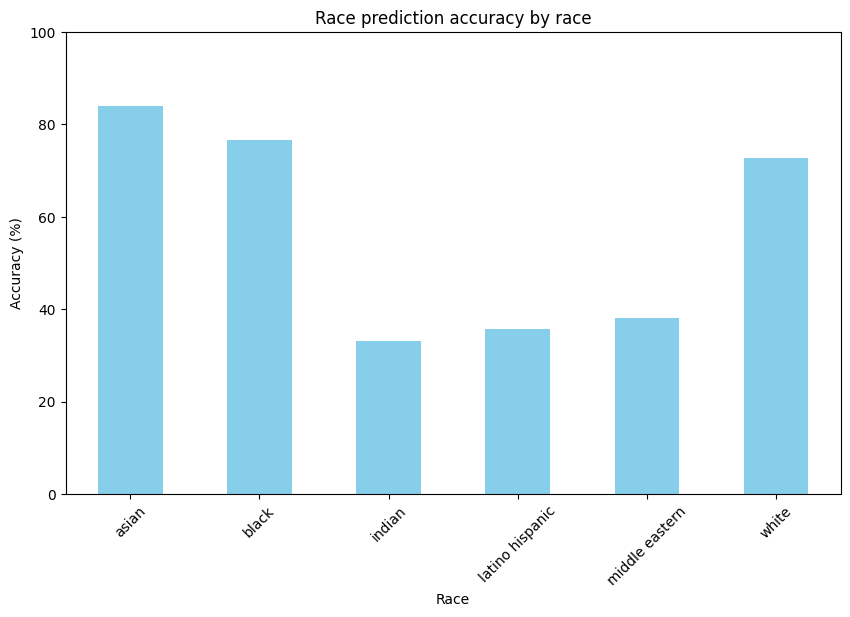

In [41]:
import matplotlib.pyplot as plt

# DataFrame columns: [race_true, race_pred, sex_true, sex_pred, age_true, age_pred, emotion_pred]

# Calculate accuracy by race
accuracy_by_race = df.groupby("race_true").apply(
    lambda x: (x["race_true"] == x["race_pred"]).mean()
)

# Plot accuracy by race
plt.figure(figsize=(10, 6))
(accuracy_by_race * 100).plot(kind="bar", color="skyblue")
plt.title("Race prediction accuracy by race")
plt.xlabel("Race")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.savefig("figures/race_accuracy.png", bbox_inches="tight")
plt.show()

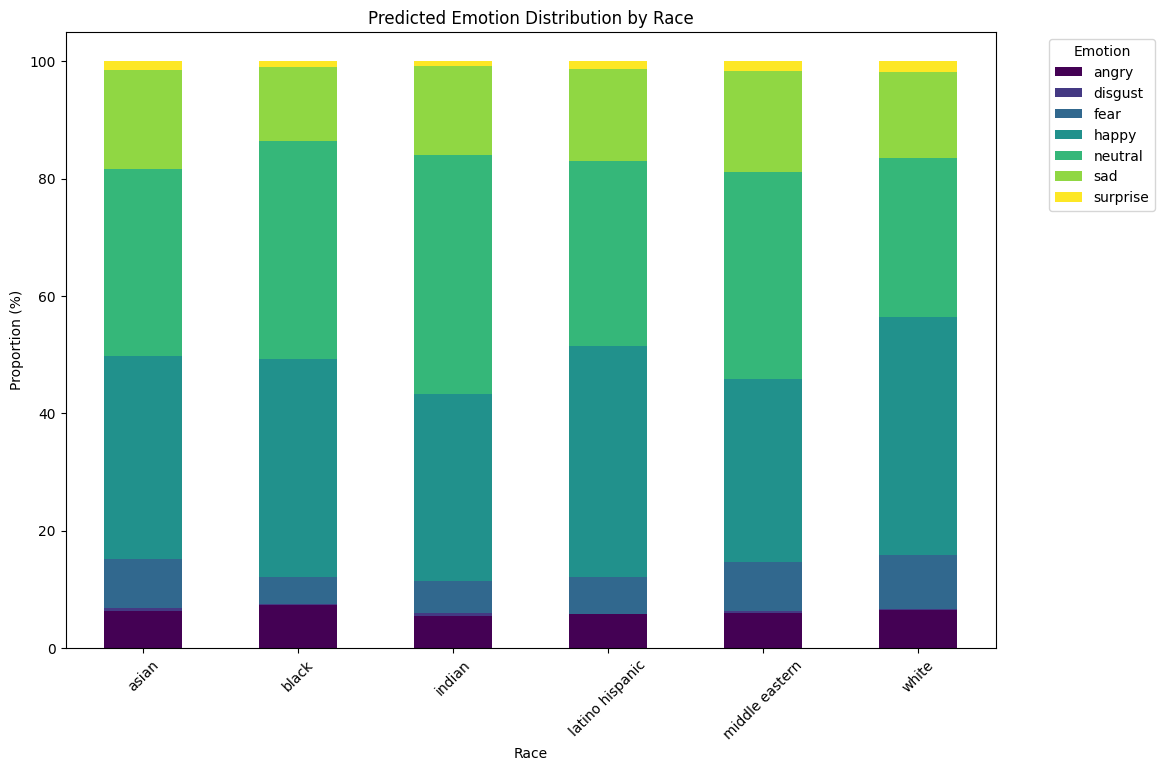

In [42]:
# Plot predicted emotion distribution by race
emotion_distribution_by_race = (
    df.groupby("race_true")["emotion_pred"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Convert proportions to percentages
emotion_distribution_by_race_percentage = emotion_distribution_by_race * 100

# Plot the distribution
emotion_distribution_by_race_percentage.plot(
    kind="bar", stacked=True, figsize=(12, 8), colormap="viridis"
)
plt.title("Predicted Emotion Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45)
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("figures/emotion.png", bbox_inches="tight")
plt.show()

/tmp/ipykernel_18105/4131533735.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_accuracy_by_race = df.groupby("race_true").apply(


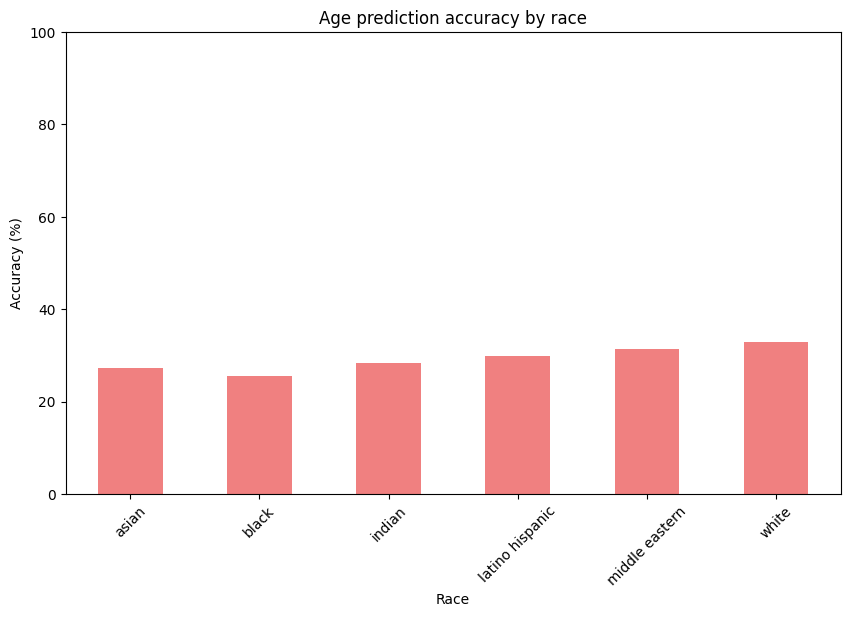

In [43]:
# Calculate age prediction accuracy by race
age_accuracy_by_race = df.groupby("race_true").apply(
    lambda x: (x["age_true"] == x["age_pred"]).mean()
)

# Plot age prediction accuracy by race
plt.figure(figsize=(10, 6))
(age_accuracy_by_race * 100).plot(kind="bar", color="lightcoral")
plt.title("Age prediction accuracy by race")
plt.xlabel("Race")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.savefig("figures/age_accuracy.png", bbox_inches="tight")
plt.show()